In [1]:
# Imorting all required Libraries

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

# Data Analysis

In [2]:
# Reading Input Data File
input_dir_path = "D:\\DeepLearning\\data.csv"
df = pd.read_csv(input_dir_path)

In [8]:
df.head(5)

,Id,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,...,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,CUST-1,KS,128,415,No,Yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,CUST-2,OH,107,415,No,Yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,CUST-3,NJ,137,415,No,No,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,CUST-4,OH,84,408,Yes,No,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,CUST-5,OK,75,415,Yes,No,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
df.columns.tolist()

['Id',
 'State',
 'Account length',
 'Area code',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

In [10]:
df.dtypes

Id                         object
State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [11]:
df.shape

(3333, 21)

In [12]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [13]:
df.isnull().any()

Id                        False
State                     False
Account length            False
Area code                 False
International plan        False
Voice mail plan           False
Number vmail messages     False
Total day minutes         False
Total day calls           False
Total day charge          False
Total eve minutes         False
Total eve calls           False
Total eve charge          False
Total night minutes       False
Total night calls         False
Total night charge        False
Total intl minutes        False
Total intl calls          False
Total intl charge         False
Customer service calls    False
Churn                     False
dtype: bool

In [14]:
df.drop(['Id','State'], axis = 1,inplace = True)

In [10]:
df.head(2)

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [15]:
df = pd.get_dummies(df, columns=['International plan', 'Voice mail plan','Churn'],drop_first=True)

In [16]:
df.head(3)

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,International plan_Yes,Voice mail plan_Yes,Churn_True
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0


In [18]:
df.rename(columns={'International plan_Yes': 'International plan',
                   'Voice mail plan_Yes': 'Voice mail plan',
                   'Churn_True':'Churn'
                  }
          , inplace=True)

In [19]:
df.head(5)

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,International plan,Voice mail plan,Churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0,0


# correlaton Matrix for each features with respect to other features

In [20]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(1)

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,International plan,Voice mail plan,Churn
Account length,1,-0.01,-0.005,0.006,0.04,0.006,-0.007,0.02,-0.007,-0.009,-0.01,-0.009,0.01,0.02,0.01,-0.004,0.02,0.003,0.02
Area code,-0.01,1,-0.002,-0.008,-0.01,-0.008,0.004,-0.01,0.004,-0.006,0.02,-0.006,-0.02,-0.02,-0.02,0.03,0.05,-0.0007,0.006
Number vmail messages,-0.005,-0.002,1,0.0008,-0.01,0.0008,0.02,-0.006,0.02,0.008,0.007,0.008,0.003,0.01,0.003,-0.01,0.009,1,-0.09
Total day minutes,0.006,-0.008,0.0008,1,0.007,1,0.007,0.02,0.007,0.004,0.02,0.004,-0.01,0.008,-0.01,-0.01,0.05,-0.002,0.2
Total day calls,0.04,-0.01,-0.01,0.007,1,0.007,-0.02,0.006,-0.02,0.02,-0.02,0.02,0.02,0.005,0.02,-0.02,0.004,-0.01,0.02
Total day charge,0.006,-0.008,0.0008,1,0.007,1,0.007,0.02,0.007,0.004,0.02,0.004,-0.01,0.008,-0.01,-0.01,0.05,-0.002,0.2
Total eve minutes,-0.007,0.004,0.02,0.007,-0.02,0.007,1,-0.01,1,-0.01,0.008,-0.01,-0.01,0.003,-0.01,-0.01,0.02,0.02,0.09
Total eve calls,0.02,-0.01,-0.006,0.02,0.006,0.02,-0.01,1,-0.01,-0.002,0.008,-0.002,0.009,0.02,0.009,0.002,0.006,-0.006,0.009
Total eve charge,-0.007,0.004,0.02,0.007,-0.02,0.007,1,-0.01,1,-0.01,0.008,-0.01,-0.01,0.003,-0.01,-0.01,0.02,0.02,0.09
Total night minutes,-0.009,-0.006,0.008,0.004,0.02,0.004,-0.01,-0.002,-0.01,1,0.01,1,-0.02,-0.01,-0.02,-0.009,-0.03,0.006,0.04


## NOTE :In above correlation matrix the feature which have value 1 with respect to other features and in dark red color are higly correlated.

In [24]:
df.groupby('Churn').mean()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,International plan,Voice mail plan
Churn,,,,,,,,,,,,,,,,,,
0,100.793684,437.074737,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825,0.065263,0.295439
1,102.664596,437.817805,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814,0.283644,0.165631


# Below Fatures Impacting more for Customer Churn

Number vmail messages
Total day minutes
Total day Charge
Total eve charge
Total intl charge
Customer service calls
International plan
Voice mail plan


# Churn and Not Churn Data

In [21]:
y = df["Churn"].value_counts()
print(y)

0    2850
1     483
Name: Churn, dtype: int64


Churn Percentage  = 14.491449144914492


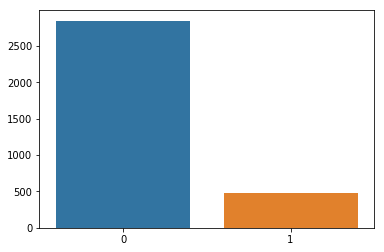

In [22]:
sns.barplot(y.index, y.values)
### Calculate the Percentage of churning
y_churn = df["Churn"][df["Churn"]==1]
print("Churn Percentage  =",str(y_churn.shape[0] / df["Churn"].shape[0] * 100))

Data is Imbalanced : the ratio of people who leaving company is very less than retain then we need to balance the data.

Under-sampling: Remove samples from over-represented classes ; use this if you have huge dataset Over-sampling: Add more samples from under-represented classes; use this if you have small dataset SMOTE (Synthetic Minority Over-sampling Technique) SMOTE is an over-sampling method. It creates synthetic samples of the minority class. We use imblearn python package to over-sample the minority classes.

# Churn By Customers with International plan



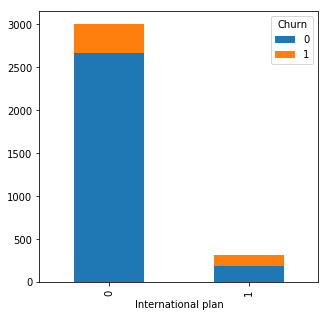

In [23]:
df.groupby(["International plan", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

# Churn By Customers with Voice mail plan



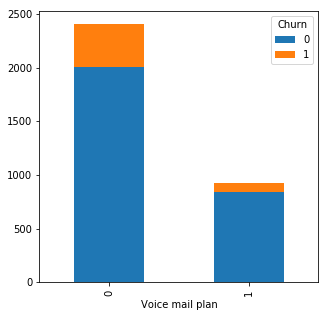

In [24]:
df.groupby(["Voice mail plan", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

# Churn By Customer service calls

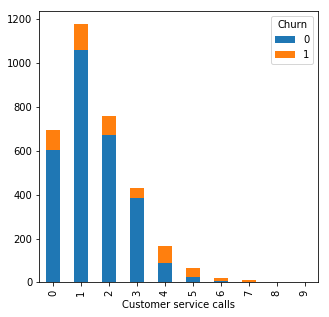

In [25]:
df.groupby(["Customer service calls", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

# Churn By vmail messages

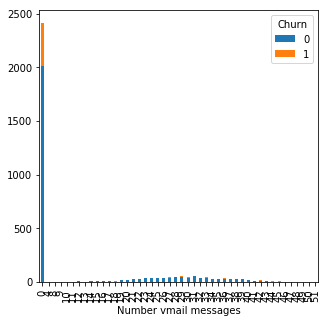

In [26]:
df.groupby(["Number vmail messages", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

# Assign the Data into X and y variable for solving the problem

In [27]:
X = ['Number vmail messages',
'Total day minutes',
'Total day calls',
'Total day charge',
'Total eve minutes',
'Total eve calls',
'Total eve charge',
'Total night minutes',
'Total night calls',
'Total night charge',
'Total intl minutes',
'Total intl calls',
'Total intl charge',
'Customer service calls',
'International plan',
'Voice mail plan']
X= df[X]
y = df["Churn"]

# OVERSAMPLING Using SMOTE

In [28]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns

os_data_X, os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Churn'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of Not Churn in oversampled data",len(os_data_y[os_data_y['Churn']==0]))
print("Number of Churn in oversampled data",len(os_data_y[os_data_y['Churn']==1]))


length of oversampled data is  4542
Number of Not Churn in oversampled data 2271
Number of Churn in oversampled data 2271


# Recursive feature elimination

In [29]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, 16)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


c:\users\vivek\pycharmprojects\dl\venv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


All the feature showing true value.

In [33]:
X_new=os_data_X[columns]
y_new=os_data_y['Churn']
print(y_new.shape)
print(X_new.shape)
#### After over sampling now churn and not churn count is equal
y_ch = y_new.value_counts()
print(y_ch)


(4542,)
(4542, 16)
1    2271
0    2271
Name: Churn, dtype: int64


# Analysis of P value

In [34]:
import statsmodels.api as sm
logit_model = sm.Logit(np.array(y_new), np.array(X_new))
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 12
                       Results: Logit
Model:              Logit            Pseudo R-squared: inf   
Dependent Variable: y                AIC:              inf   
Date:               2019-04-30 16:48 BIC:              inf   
No. Observations:   4542             Log-Likelihood:   -inf  
Df Model:           15               LL-Null:          0.0000
Df Residuals:       4526             LLR p-value:      1.0000
Converged:          1.0000           Scale:            1.0000
No. Iterations:     12.0000                                  
--------------------------------------------------------------
         Coef.    Std.Err.     z     P>|z|    [0.025    0.975]
--------------------------------------------------------------
x1        0.0276    0.0119   2.3244  0.0201    0.0043   0.0509
x2       -3.1752    2.3136  -1.3724  0.1699   -7.7098   1.3593
x3       -0.0109    0.0017  -6.3677  0.0000   -0.0143

c:\users\vivek\pycharmprojects\dl\venv\lib\site-packages\statsmodels\discrete\discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\users\vivek\pycharmprojects\dl\venv\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
c:\users\vivek\pycharmprojects\dl\venv\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\vivek\pycharmprojects\dl\venv\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [35]:
X_new.columns.tolist()

['Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'International plan',
 'Voice mail plan']

In [36]:
X = ['Number vmail messages',
'Total eve calls',
 'Total day calls',
'Total night calls',
'Total intl minutes',
'Total intl calls',
'Total intl charge',
'Customer service calls',
'International plan',
'Voice mail plan']
X_new = os_data_X[X]
y_new=os_data_y['Churn']
X_new.columns.tolist()

['Number vmail messages',
 'Total eve calls',
 'Total day calls',
 'Total night calls',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'International plan',
 'Voice mail plan']

In [37]:
import statsmodels.api as sm
logit_model = sm.Logit(np.array(y_new), np.array(X_new))
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
                       Results: Logit
Model:              Logit            Pseudo R-squared: inf   
Dependent Variable: y                AIC:              inf   
Date:               2019-04-30 16:49 BIC:              inf   
No. Observations:   4542             Log-Likelihood:   -inf  
Df Model:           9                LL-Null:          0.0000
Df Residuals:       4532             LLR p-value:      1.0000
Converged:          1.0000           Scale:            1.0000
No. Iterations:     6.0000                                   
--------------------------------------------------------------
         Coef.    Std.Err.     z     P>|z|    [0.025    0.975]
--------------------------------------------------------------
x1        0.0287    0.0112   2.5558  0.0106    0.0067   0.0506
x2       -0.0031    0.0015  -1.9765  0.0481   -0.0061  -0.0000
x3       -0.0027    0.0015  -1.8543  0.0637   -0.0057 

c:\users\vivek\pycharmprojects\dl\venv\lib\site-packages\statsmodels\discrete\discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\users\vivek\pycharmprojects\dl\venv\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
c:\users\vivek\pycharmprojects\dl\venv\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\vivek\pycharmprojects\dl\venv\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


# Now Every Columns have P value Less than .05 and data is ready for model

# Implementing the model

# Feature Scaling Standardized Data

In [38]:
from sklearn import preprocessing

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_new, y_new, test_size=0.2, random_state=0)

scaler  = preprocessing.StandardScaler()
X_train_n = scaler.fit_transform(X_train_n)
X_test_n =  scaler.transform(X_test_n)

# Logistic Regression Model Fitting

In [40]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_n, y_train_n)


c:\users\vivek\pycharmprojects\dl\venv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
results = confusion_matrix(y_test_n, logreg.predict(X_test_n)) 
print('Confusion Matrix :')
print(results)
print(classification_report(y_test_n, logreg.predict(X_test_n)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(accuracy_score(y_test_n, logreg.predict(X_test_n))))

Confusion Matrix :
[[319 138]
 [160 292]]
              precision    recall  f1-score   support

           0       0.67      0.70      0.68       457
           1       0.68      0.65      0.66       452

   micro avg       0.67      0.67      0.67       909
   macro avg       0.67      0.67      0.67       909
weighted avg       0.67      0.67      0.67       909

Accuracy of logistic regression classifier on test set: 0.672


Text(0.5, 1.0, 'Logistic Regression Matrix')

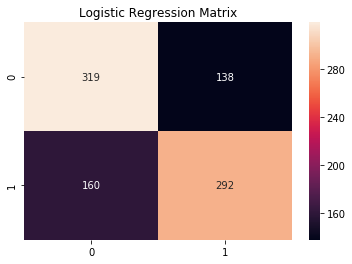

In [42]:
logix_confution_mtrix = confusion_matrix(y_test_n, logreg.predict(X_test_n)) 
sns.heatmap(logix_confution_mtrix, annot=True, fmt='')
title = 'Logistic Regression Matrix'
plt.title(title)

# Random Forest Model Fitting

In [43]:
rf = RandomForestClassifier()
rf.fit(X_train_n, y_train_n)

c:\users\vivek\pycharmprojects\dl\venv\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
results = confusion_matrix(y_test_n, rf.predict(X_test_n)) 
print('Confusion Matrix :')
print(results) 
print(classification_report(y_test_n, rf.predict(X_test_n)))
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test_n, rf.predict(X_test_n))))

Confusion Matrix :
[[428  29]
 [ 62 390]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       457
           1       0.93      0.86      0.90       452

   micro avg       0.90      0.90      0.90       909
   macro avg       0.90      0.90      0.90       909
weighted avg       0.90      0.90      0.90       909

Random Forest Accuracy: 0.900


Text(0.5, 1.0, 'Random Forest Matrix')

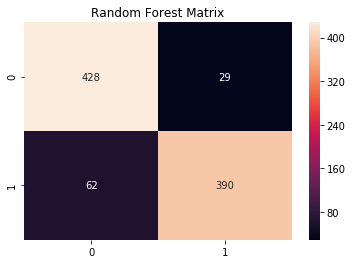

In [45]:
random_forest_confution_mtrix = confusion_matrix(y_test_n, rf.predict(X_test_n)) 
sns.heatmap(random_forest_confution_mtrix, annot=True, fmt='')
title = 'Random Forest Matrix'
plt.title(title)

# SVM CLASSIFIER

In [46]:
# SVC with linear kernel
from sklearn import svm
svc = svm.SVC().fit(X_train_n, y_train_n)

In [47]:
results = confusion_matrix(y_test_n, svc.predict(X_test_n)) 
print('Confusion Matrix :')
print(results) 
print(classification_report(y_test_n, svc.predict(X_test_n)))
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test_n, svc.predict(X_test_n))))

Confusion Matrix :
[[381  76]
 [139 313]]
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       457
           1       0.80      0.69      0.74       452

   micro avg       0.76      0.76      0.76       909
   macro avg       0.77      0.76      0.76       909
weighted avg       0.77      0.76      0.76       909

Random Forest Accuracy: 0.763


Text(0.5, 1.0, 'SVM Matrix')

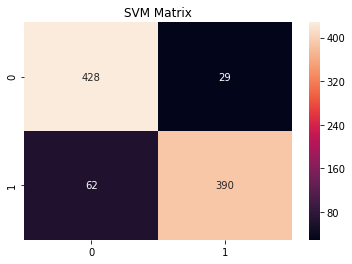

In [48]:
SVM_confution_mtrix = confusion_matrix(y_test_n, rf.predict(X_test_n)) 
sns.heatmap(SVM_confution_mtrix, annot=True, fmt='')
title = 'SVM Matrix'
plt.title(title)

In [49]:
weight = pd.Series(logreg.coef_[0], index = X_new.columns.values )
print(weight)

Number vmail messages     0.381252
Total eve calls           0.017398
Total day calls           0.018476
Total night calls         0.012863
Total intl minutes       -0.164693
Total intl calls         -0.036891
Total intl charge         0.224952
Customer service calls    0.715541
International plan        0.807807
Voice mail plan          -0.891840
dtype: float64


Accuracy for all 3 algorithm :
 1- logistic Regression - 0.670
 2 -Random Forest       - 0.886
 3 - SVM                - 0.752


# Note :Random Forest have very good accuracy : 0.886 so we will select this Model for churn prediction

# Note: Below Features which are impacting more for churn


1 - Voice mail plan
2 - Total intl minutes
3 - Total intl calls
4 - Total night charge
5 - Total intl minutes
6 - Total intl charge

# Suggestion :  We can apply on line training on this model for better accuracy and prediction.
    we can also build this model by using ANN which will work more fast and for large data set.